In [1]:
# ============================================================
# TEXT-TO-IMAGE MODEL LOADER
# (RUN THIS CELL ONLY ONCE IN JUPYTER LAB)
# ============================================================

import os
import torch
import warnings
from diffusers import StableDiffusionXLPipeline
import warnings
warnings.filterwarnings('ignore')

# ------------------------------------------------------------
# Suppress unnecessary warnings for clean notebook output
# ------------------------------------------------------------
warnings.filterwarnings("ignore")

# ------------------------------------------------------------
# Path to locally stored SDXL model (.safetensors)
# ------------------------------------------------------------
MODEL_PATH = "models/sd_xl_base_1.0.safetensors"

# Validate model file existence
if not os.path.isfile(MODEL_PATH):
    raise FileNotFoundError(
        f"❌ SDXL model file not found at: {MODEL_PATH}\n"
        "Please ensure the model is downloaded and placed correctly."
    )

# ------------------------------------------------------------
# Device & Precision Configuration
# ------------------------------------------------------------
# - CUDA + float16 → Faster & memory-efficient
# - CPU + float32 → Stable fallback
# ------------------------------------------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
dtype = torch.float16 if device == "cuda" else torch.float32

print(f" Running on device : {device}")
print(f" Torch data type  : {dtype}")

# ------------------------------------------------------------
# Load SDXL Pipeline from single safetensors file
# ------------------------------------------------------------
pipe = StableDiffusionXLPipeline.from_single_file(
    MODEL_PATH,
    torch_dtype=dtype,
    use_safetensors=True,
    safety_checker=None,        # Disabled for research/demo usage
    add_watermarker=False       # Clean outputs (no watermark)
)

# Move pipeline to selected device (GPU / CPU)
pipe.to(device)

# ------------------------------------------------------------
# Memory Optimization (Important for Jupyter & Low VRAM GPUs)
# ------------------------------------------------------------
pipe.enable_attention_slicing()
pipe.enable_vae_slicing()

print("✅ SDXL model loaded successfully and ready for inference")

D:\Git Hub\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🔧 Running on device : cuda
🔧 Torch data type  : torch.float16


Loading pipeline components...: 100%|████████████████████████████████████████████████████| 7/7 [00:01<00:00,  3.85it/s]


✅ SDXL model loaded successfully and ready for inference


📝 Prompt:
Iron Man in advanced iron armor standing on Avengers Tower rising from the ocean, cinematic sunset lighting, dramatic sky, reflective metal surfaces, heroic pose, detailed armor, sharp focus, epic movie scene

⏳ Generating image...


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [07:40<00:00, 16.45s/it]


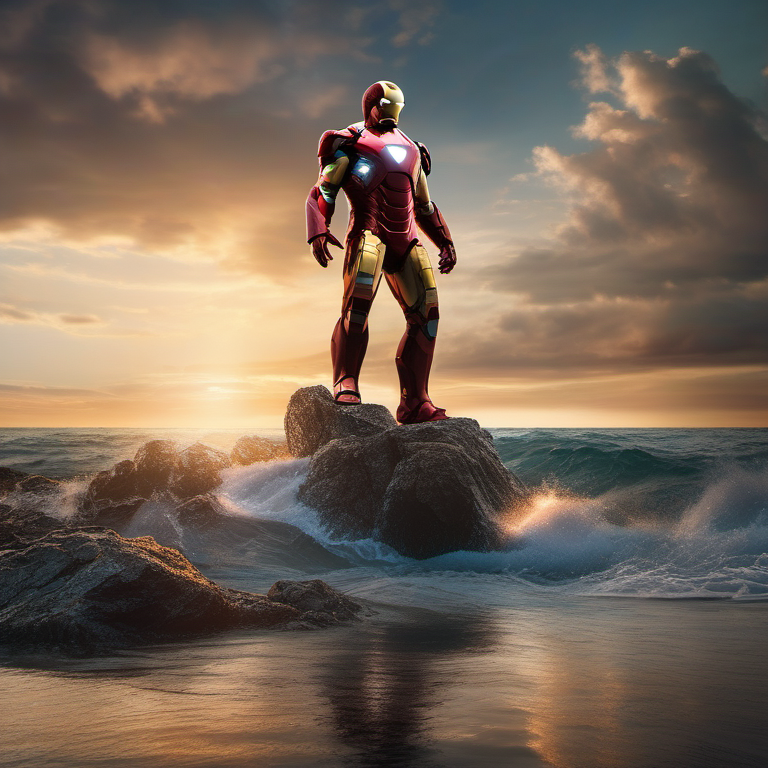


⏱ Generation time: 507.5 seconds


In [2]:
# ============================================================
# (RUN THIS CELL TO GENERATE IMAGES FROM TEXT PROMPTS)
# ============================================================

import time
from IPython.display import display

# ------------------------------------------------------------
# TEXT PROMPT
# Keep prompts concise and descriptive (≈ 70–80 tokens max)
# ------------------------------------------------------------
prompt = 'Iron Man in advanced iron armor Standing on stone, cinematic sunset lighting, dramatic sky, reflective metal surfaces, heroic pose, detailed armor, sharp focus, epic movie scene'

# ------------------------------------------------------------
# NEGATIVE PROMPT
# Helps remove common generation issues
# ------------------------------------------------------------
negative_prompt = 'cartoon, anime, illustration, blurry, low quality, distorted face, extra limbs, extra fingers, deformed armor, bad proportions, watermark, logo, text'

# ------------------------------------------------------------
# GENERATION PARAMETERS (Balanced & Stable Defaults)
# ------------------------------------------------------------
width = 768
height = 768
num_inference_steps = 28     # More steps = better detail (slower)
guidance_scale = 6.5        # Prompt adherence vs creativity
generator = None            # None → more randomness & creativity

# ------------------------------------------------------------
# Inference Execution
# ------------------------------------------------------------
print("Prompt:")
print(prompt)
print("\n Generating image...")

start_time = time.time()

# Disable gradient tracking for faster & memory-safe inference
with torch.no_grad():
    result = pipe(
        prompt=prompt,
        negative_prompt=negative_prompt,
        width=width,
        height=height,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        generator=generator,
    )

# Extract generated image
image = result.images[0]

# Display inside Jupyter Notebook
display(image)

print(f"\n⏱ Generation time: {time.time() - start_time:.1f} seconds")
